In [9]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt 
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6
from pandas.plotting import register_matplotlib_converters

In [10]:
dataset = pd.read_csv("stocks.csv")
dataset['Date'] = pd.to_datetime(dataset['Date'], infer_datetime_format=True)
indexedDataset = dataset.set_index(['Date'])

In [11]:
from datetime import datetime
indexedDataset

,Close
Date,
2017-06-01,2430.060059
2017-06-02,2439.070068
2017-06-05,2436.100098
2017-06-06,2429.330078
2017-06-07,2433.139893
2017-06-08,2433.790039
2017-06-09,2431.770020
2017-06-12,2429.389893
2017-06-13,2440.350098


/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


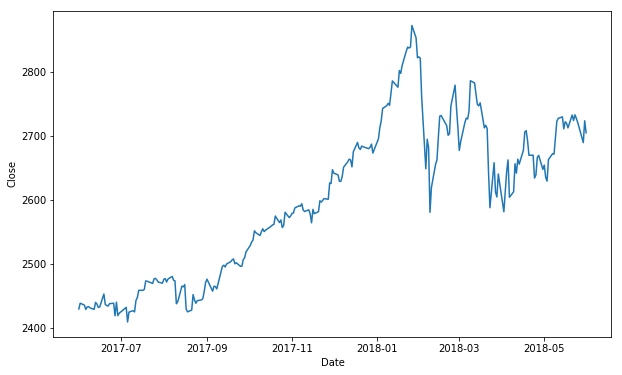

In [12]:
plt.xlabel("Date")
plt.ylabel("Close")
plt.plot(indexedDataset)

In [13]:
rolmean = indexedDataset.rolling(window=12).mean()

rolstd = indexedDataset.rolling(window=12).std()
print(rolmean, rolstd)

                  Close
Date                   
2017-06-01          NaN
2017-06-02          NaN
2017-06-05          NaN
2017-06-06          NaN
2017-06-07          NaN
2017-06-08          NaN
2017-06-09          NaN
2017-06-12          NaN
2017-06-13          NaN
2017-06-14          NaN
2017-06-15          NaN
2017-06-16  2433.877503
2017-06-19  2435.827494
2017-06-20  2435.657491
2017-06-21  2435.616659
2017-06-22  2436.047485
2017-06-23  2436.477498
2017-06-26  2436.917501
2017-06-27  2435.884989
2017-06-28  2436.826660
2017-06-29  2435.105815
2017-06-30  2433.896647
2017-07-03  2433.609151
2017-07-05  2433.558329
2017-07-06  2429.915832
2017-07-07  2428.928324
2017-07-10  2428.246643
2017-07-11  2427.499146
2017-07-12  2427.911641
2017-07-13  2428.641642
...                 ...
2018-04-19  2660.875814
2018-04-20  2662.996643
2018-04-23  2663.617472
2018-04-24  2666.124980
2018-04-25  2668.311646
2018-04-26  2669.150798
2018-04-27  2671.460795
2018-04-30  2670.132467
2018-05-01  2670

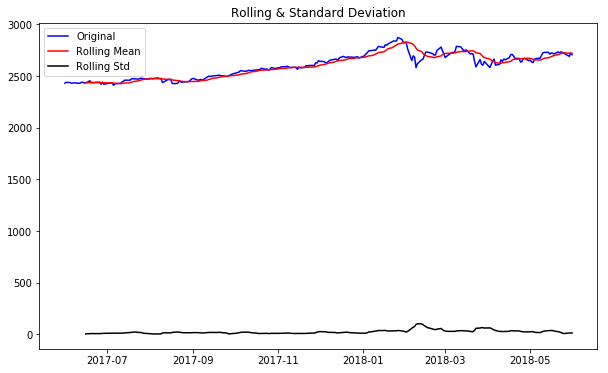

In [14]:
orig = plt.plot(indexedDataset, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling & Standard Deviation')
plt.show(block=False)

In [15]:
from statsmodels.tsa.stattools import adfuller

print ('Results of Dickey Fuller test:')
dftest = adfuller(indexedDataset['Close'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)
    

Results of Dickey Fuller test:
Test Statistic                  -1.323328
p-value                          0.618433
#Lags Used                      10.000000
Number of Observations Used    241.000000
Critical Value (1%)             -3.457779
Critical Value (5%)             -2.873609
Critical Value (10%)            -2.573202
dtype: float64


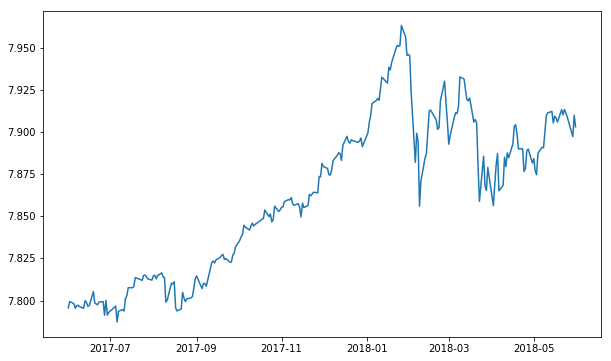

In [16]:
indexedDataset_logScale = np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

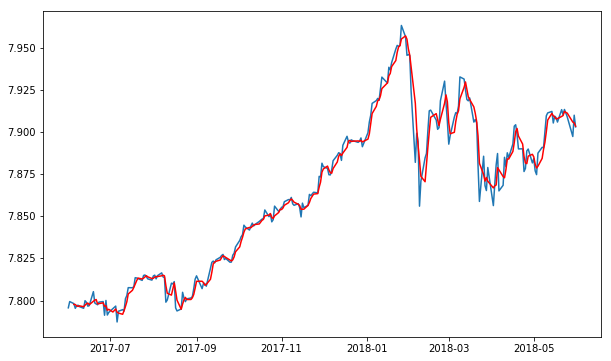

In [17]:
movingAverage = indexedDataset_logScale.rolling(window=3).mean()
movingSTD = indexedDataset_logScale.rolling(window=3).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color='red')

In [18]:
datasetLogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)

datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,Close
Date,
2017-06-05,0.000421
2017-06-06,-0.002261
2017-06-07,0.000117
2017-06-08,0.000700
2017-06-09,-0.000464
2017-06-12,-0.000930
2017-06-13,0.002674
2017-06-14,0.000836
2017-06-15,-0.001827


In [19]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    movingAverage = timeseries.rolling(window=3).mean()
    movingSTD = timeseries.rolling(window=3).std()
    
    orig = plt.plot(indexedDataset, color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling & Standard Deviation')
    plt.show(block=False)
    
    print ('Results of Dickey Fuller test:')
    dftest = adfuller(indexedDataset['Close'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    



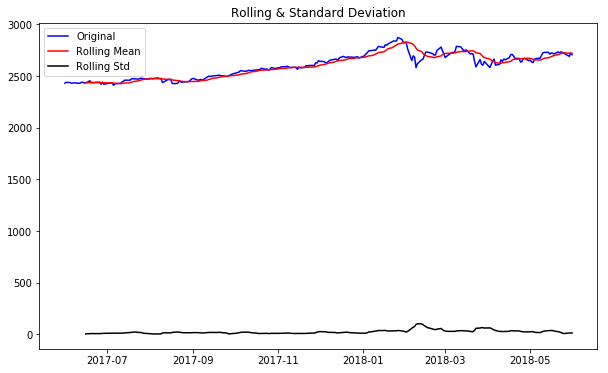

Results of Dickey Fuller test:
Test Statistic                  -1.323328
p-value                          0.618433
#Lags Used                      10.000000
Number of Observations Used    241.000000
Critical Value (1%)             -3.457779
Critical Value (5%)             -2.873609
Critical Value (10%)            -2.573202
dtype: float64


In [20]:
test_stationarity(datasetLogScaleMinusMovingAverage)

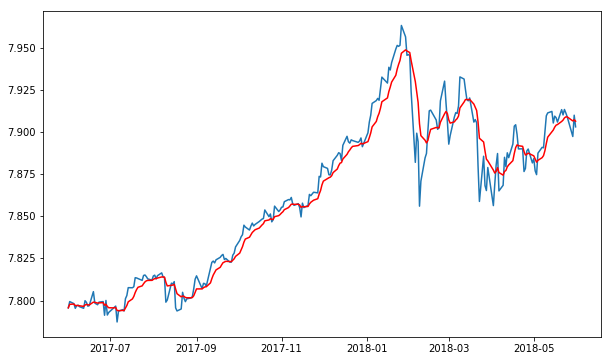

In [21]:
exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife=3, min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage, color='red')


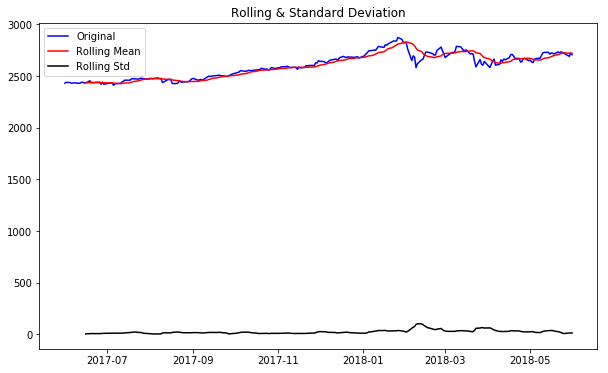

Results of Dickey Fuller test:
Test Statistic                  -1.323328
p-value                          0.618433
#Lags Used                      10.000000
Number of Observations Used    241.000000
Critical Value (1%)             -3.457779
Critical Value (5%)             -2.873609
Critical Value (10%)            -2.573202
dtype: float64


In [22]:
datasetLogScaleMinusMovingExponentialDecayAverage = indexedDataset_logScale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

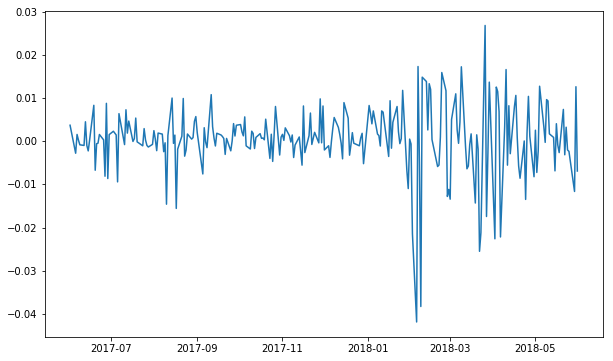

In [23]:
datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

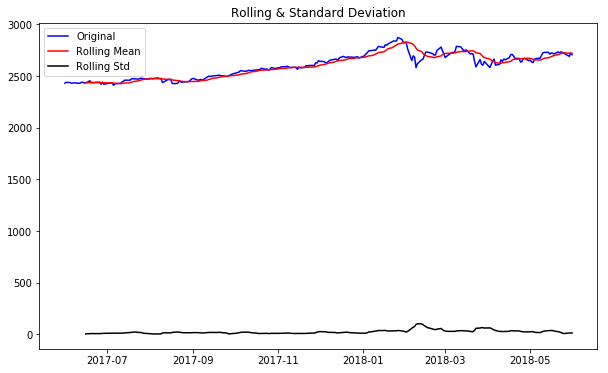

Results of Dickey Fuller test:
Test Statistic                  -1.323328
p-value                          0.618433
#Lags Used                      10.000000
Number of Observations Used    241.000000
Critical Value (1%)             -3.457779
Critical Value (5%)             -2.873609
Critical Value (10%)            -2.573202
dtype: float64


In [24]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

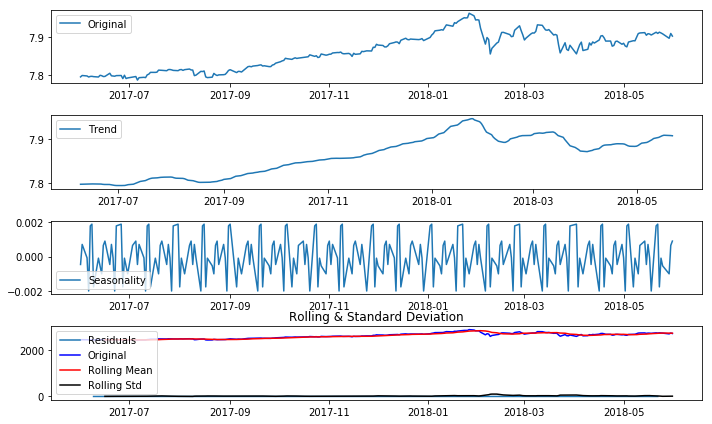

Results of Dickey Fuller test:
Test Statistic                  -1.323328
p-value                          0.618433
#Lags Used                      10.000000
Number of Observations Used    241.000000
Critical Value (1%)             -3.457779
Critical Value (5%)             -2.873609
Critical Value (10%)            -2.573202
dtype: float64


In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedDataset_logScale, model='additive', freq=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logScale, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

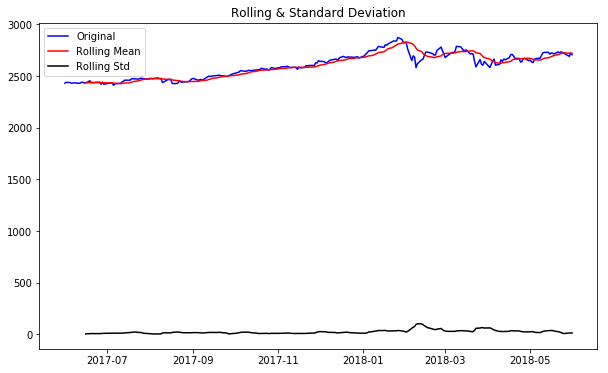

Results of Dickey Fuller test:
Test Statistic                  -1.323328
p-value                          0.618433
#Lags Used                      10.000000
Number of Observations Used    241.000000
Critical Value (1%)             -3.457779
Critical Value (5%)             -2.873609
Critical Value (10%)            -2.573202
dtype: float64
            Close
count  240.000000
mean     0.000004
std      0.007255
min     -0.041053
25%     -0.003221
50%      0.000258
75%      0.003378
max      0.021750


In [26]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData )
print(residual.describe())

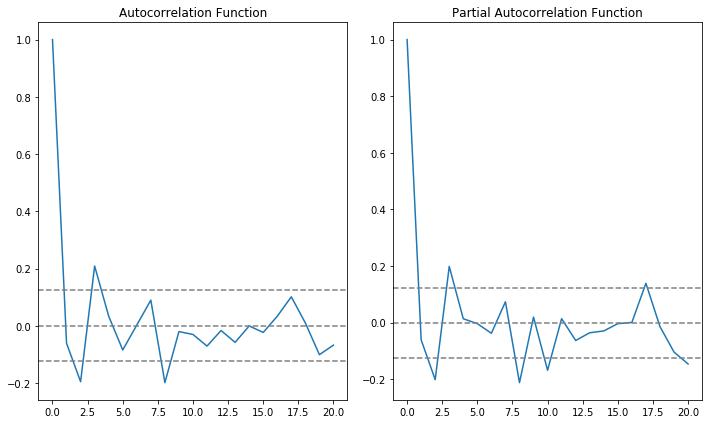

In [27]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(datasetLogDiffShifting, nlags=20)
lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method='ols')

plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color="gray")
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color="gray")
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color="gray")
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color="gray")
plt.title('Partial Autocorrelation Function')
plt.tight_layout()




/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Plotting AR Model


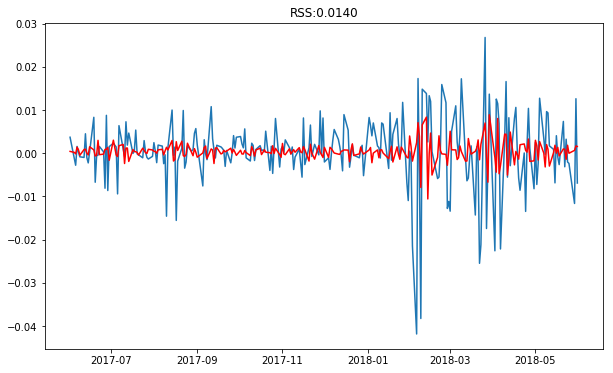

In [28]:
from statsmodels.tsa.arima_model import ARIMA


#AR MODEL   
model = ARIMA(indexedDataset_logScale, order=(2, 1 ,2))
results_AR = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS:%.4f'% sum((results_AR.fittedvalues-datasetLogDiffShifting["Close"])**2))
print('Plotting AR Model')

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Plotting AR model


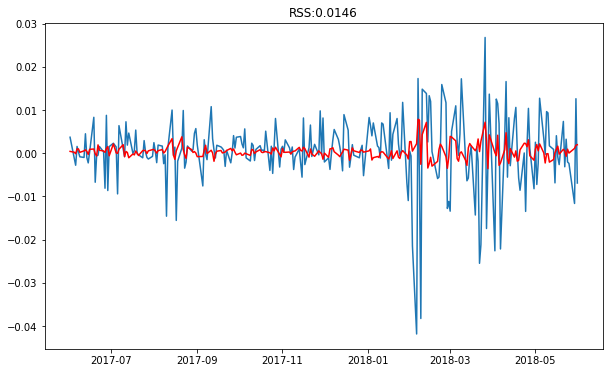

In [29]:
#MA MODEL
model = ARIMA(indexedDataset_logScale, order=(2,1,0))
results_MA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS:%.4f'% sum((results_MA.fittedvalues-datasetLogDiffShifting["Close"])**2))
print('Plotting AR model')

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5, 1.0, 'RSS: 0.0140')

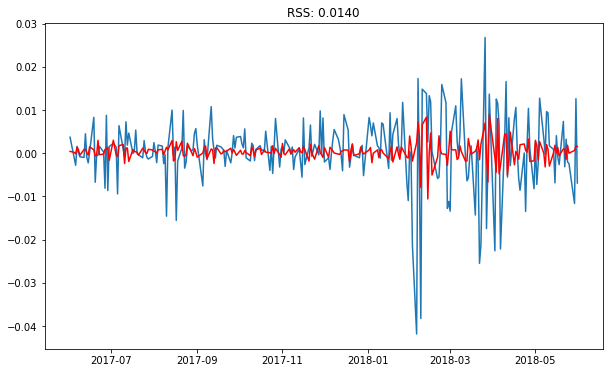

In [30]:
model = ARIMA(indexedDataset_logScale, order=(2, 1, 2))
results_ARIMA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-datasetLogDiffShifting["Close"])**2))

In [31]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Date
2017-06-02    0.000421
2017-06-05    0.000196
2017-06-06   -0.000142
2017-06-07    0.001400
2017-06-08    0.000793
dtype: float64


In [32]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Date
2017-06-02    0.000421
2017-06-05    0.000616
2017-06-06    0.000475
2017-06-07    0.001875
2017-06-08    0.002668
dtype: float64


In [33]:
predictions_ARIMA_log = pd.Series(indexedDataset_logScale['Close'].ix[0], index=indexedDataset_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Date
2017-06-01    7.795671
2017-06-02    7.796092
2017-06-05    7.796287
2017-06-06    7.796146
2017-06-07    7.797546
dtype: float64

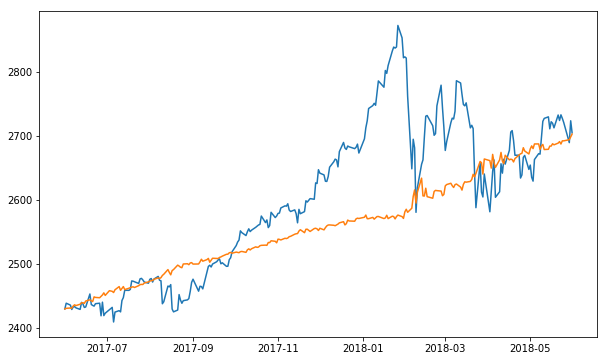

In [34]:
predictions_ARIMA= np.exp(predictions_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA)

In [35]:
indexedDataset

,Close
Date,
2017-06-01,2430.060059
2017-06-02,2439.070068
2017-06-05,2436.100098
2017-06-06,2429.330078
2017-06-07,2433.139893
2017-06-08,2433.790039
2017-06-09,2431.770020
2017-06-12,2429.389893
2017-06-13,2440.350098


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


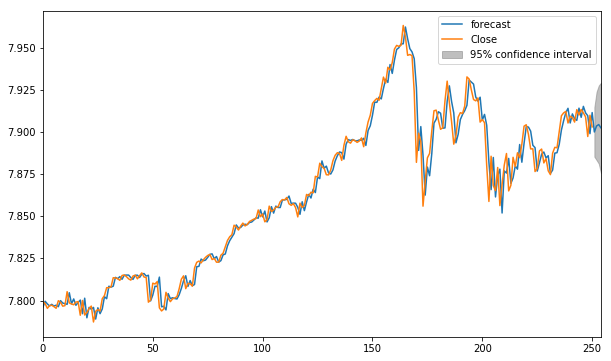

In [36]:
    #This is for the next 3 days 
results_ARIMA.plot_predict(1,255)
x=results_ARIMA.forecast(steps=3)




   #This is for the next year
#results_ARIMA.plot_predict(1,617)
#x=results_ARIMA.forecast(steps=12)





    #in array form only
#results_ARIMA.forecast(steps=120)


In [37]:
    #in array form only
results_ARIMA.forecast(steps=3)

(array([7.899928  , 7.90347927, 7.90432238]),
 array([0.00747968, 0.0103173 , 0.01180723]),
 array([[7.8852681 , 7.9145879 ],
        [7.88325774, 7.9237008 ],
        [7.88118063, 7.92746412]]))

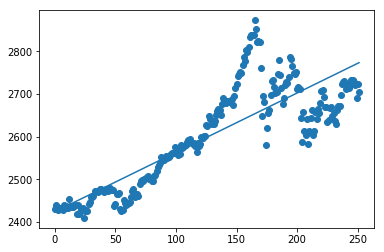

In [38]:
import numpy as np
from sklearn.linear_model import LinearRegression

dates = []
for i in range(0, len(dataset["Date"])):
    dates.append(i)
X = np.reshape(dates, (-1,1))
y = dataset["Close"]
reg = LinearRegression().fit(X, y)

%matplotlib inline
plt.scatter(X, indexedDataset)

plt.plot(X, reg.predict(X))




#THIS IS THE MSE (Accuracy Score)

In [39]:
reg.score(X, y)
#THIS IS THE ACCURACY SCORE

0.7183476725867101

In [126]:
#from sklearn.metrics import mean_squared_error

In [216]:
##error = mean_squared_error(test, predictions)
##print('Test MSE: %.3f' % error)